# Challenge 3

### The question
For challenge 3 we are tasked to compare machine learning algorithms and see which ever one is best. Within this notebook we are going to be trying out; SVM, MLP, Random Forest and Essembly Learning. We will comparing the accuracy and seeing which algorithm is the best for this dataset.

### Optimizing the algorithms
For each algorithm we will be trying to find the best possible options to get the best result out of each algorithm.

### Personal goals
#### Moduality
This has also been applied in challenge 1, I want to make all my methods as modular as possible. This means having my own methods have plenty of parameters to edit the SKLearn methods.
#### Documentation
I want to document everything as well as I possibly can. Making comments on code lines and having markdown sections to explain my reasoning behind the code as well as I can. This will be the biggest challenge for me.

# The dataset
The dataset I picked for this assignment was Gender Recognition by Voice. After searching for a usable dataset this one peaked my interest and was good to work with. I found this dataset on Kaggle and [***this is the link to the dataset***](https://www.kaggle.com/primaryobjects/voicegender).
The domain of this dataset is ***DOMAIN*** because...


### Description
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz
### Columns
**sd:** standard deviation of frequency

**median:** median frequency (in kHz)

**Q25:** first quantile (in kHz)

**Q75:** third quantile (in kHz)

**IQR:** interquantile range (in kHz)

**skew:** skewness (see note in specprop description)

**kurt:** kurtosis (see note in specprop description)

**sp.ent:** spectral entropy

**sfm:** spectral flatness

**mode:** mode frequency

**centroid:** frequency centroid (see specprop)

**peakf:** peak frequency (frequency with highest energy)

**meanfun:** average of fundamental frequency measured across acoustic signal

**minfun:** minimum fundamental frequency measured across acoustic signal

**maxfun:** maximum fundamental frequency measured across acoustic signal

**meandom:** average of dominant frequency measured across acoustic signal

**mindom:** minimum of dominant frequency measured across acoustic signal

**maxdom:** maximum of dominant frequency measured across acoustic signal

**dfrange:** range of dominant frequency measured across acoustic signal

**modindx:** modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental
frequencies divided by the frequency range

**label:** male or female
### Label and goal
The label is stored in the *label* column.

# Prepairing the notebook
To start off this notebook we are going to be making methods. We make these to prepare for a dataset which might change. As this is the first dataset I need to pick myself, it might be a unusable dataset with features that are not good enough to use in this context. With the methods made I can simply change out the dataset and everything should still work.

Since Katherine and I also did this for challenge 1 to be able to swap out the Iris and Whine set easily, I will be getting my code from the challenge 1. This will be noted in the documentation but will still be explained.
### Importing libraries
We will be using a lot of libraries within this notebook and I will document these all in this code section. There should be no import throughout the notebook itself.

In [1]:
#Core libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
#Further imports
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn import metrics
#Versionprinting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-learn version:', sk.__version__)
print('Matplotlib version:', matplotlib.__version__)
#Inline version
%matplotlib inline

NumPy version: 1.12.1
Pandas version: 0.20.1
Scikit-learn version: 0.18.1
Matplotlib version: 2.0.2


### Getting the dataset
I currently have the dataset downloaded to my computer since kaggle doesn't support direct downloads. I will include the file in the zip and this can also be found in my GitHub.

In [26]:
df_voice = pd.read_csv("voice.csv")
df_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


# Analysis
### Boxplots
To analyze our features we want to look at the features and see how they compare. What features are good to use and where do we see the least amount of overlap. To make this easier on ourselves, we are going to write an automated method to do this work. We can just make a list of features and run these through the method and out come all the boxplots.

In [2]:
def boxPlots(df, features, label):
    if(len(features)>4):
        for i in range(int(len(features)/4)+1):
            try:
                df.boxplot(column=features[4*i:4*(i+1)], by=label, figsize=(15,8), layout=(1,4))
            except:
                try:
                    df.boxplot(column=features[4*i], by=label, figsize=(15,8), layout=(1,4))
                    df.boxplot(column=features[4*i+1], by=label, figsize=(15,8), layout=(1,4))
                    df.boxplot(column=features[4*i+2], by=label, figsize=(15,8), layout=(1,4))
                    df.boxplot(column=features[4*i+3], by=label, figsize=(15,8), layout=(1,4))
                except:
                    df = df #Index is out of range but needs code to not go further
    else:
        df.boxplot(column=features, by=label, figsize=(15,8), layout=(1,4))
#         maximums = []
#         for i in range(len(features)):
#             maximums.append(max(df[features[i]]))
#         for i in range(int(len(features)/4)+1):
#             seperate=False
#             seperateindex = 0
#             beginindex = 4*i
#             endindex= 4*(i+1)
#             equalizer = 5
#             plotted = features[beginindex:endindex]
#             try:
#                 for q in range(4):
#                     if(int(maximums[beginindex+q]/maximums[beginindex]) > equalizer) or (int(maximums[beginindex+q]/maximums[beginindex+1]) > equalizer) or(int(maximums[beginindex+q]/maximums[beginindex+2]) > equalizer) or (int(maximums[beginindex+q]/maximums[beginindex+3]) > equalizer):
#                         seperate = True
#                         seperateindex = q
#             except:
#                 seperate = True 
#             if(seperate == False):
#                 df.boxplot(column=plotted, by=label, figsize=(15,8), layout=(1,4))
#             else:
#                 rest = plotted[beginindex:seperateindex] + plotted[seperateindex+1:endindex]
#                 print("Index: " + str(seperateindex))
#                 print(len(plotted[beginindex:seperateindex]))
#                 print(len(plotted[seperateindex+1:endindex]))
#                 print(len(rest))
#                 df.boxplot(column=plotted[seperateindex], by=label, figsize=(15,8), layout=(1,4))
#                 df.boxplot(column=rest, by=label, figsize=(15,8), layout=(1,4))

## Explaination
### Defining the method
To start off, we give the method the name `boxPlots` it is descriptive enough for me and easy to type.
#### The parameters
    - df:       The dataframe used to visualize the features
    - features: A Tuple of the features wanting to be analysed
    - label:    The string of which column is the label
```py
def boxPlots(df, features, label):
```
### Checking the amount of features present
If we have more than 4 features we want to split them up in to multiple sets of 4. This is why we do an initial check to see if we have more than 4 features.
```py
if(len(features)>4):
```
### Printing the boxplots by 4
If there are more features than 4 we want to split these into groups of 4 and print them seperately.
First, we make a loop by deviding the amount of features by 4 and adding 1. The `int()` method **ALWAYS** rounds downwards and this is not good for us as the last features will be cut off. This is the reason we add 1.
Second, we want to try plotting all 4 figures at once, if this fails it is most likely an index out of range exception. To make sure all boxplots get plotted we then again implement a try in the catch to plot every single boxplot after one another.
This isn't the most clean way to do it but it works.
```py
        for i in range(int(len(features)/4)+1):
            try:
                df.boxplot(column=features[4*i:4*(i+1)], by=label, figsize=(15,8), layout=(1,4))
            except:
                try:
                    df.boxplot(column=features[4*i], by=label, figsize=(15,8), layout=(1,4))
                    df.boxplot(column=features[4*i+1], by=label, figsize=(15,8), layout=(1,4))
                    df.boxplot(column=features[4*i+2], by=label, figsize=(15,8), layout=(1,4))
                    df.boxplot(column=features[4*i+3], by=label, figsize=(15,8), layout=(1,4))
                except:
                    df = df #Index is out of range but needs code to not go further
                    ```
                    
## Analyzing the dataset


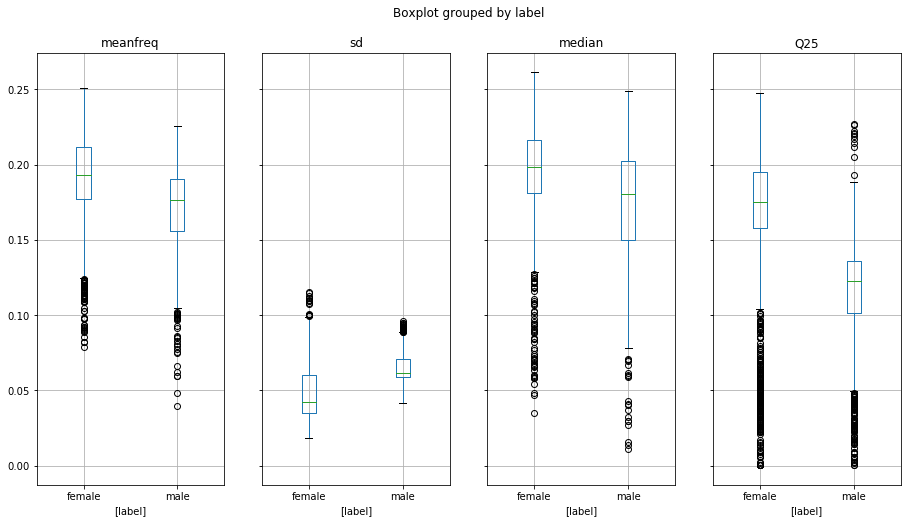

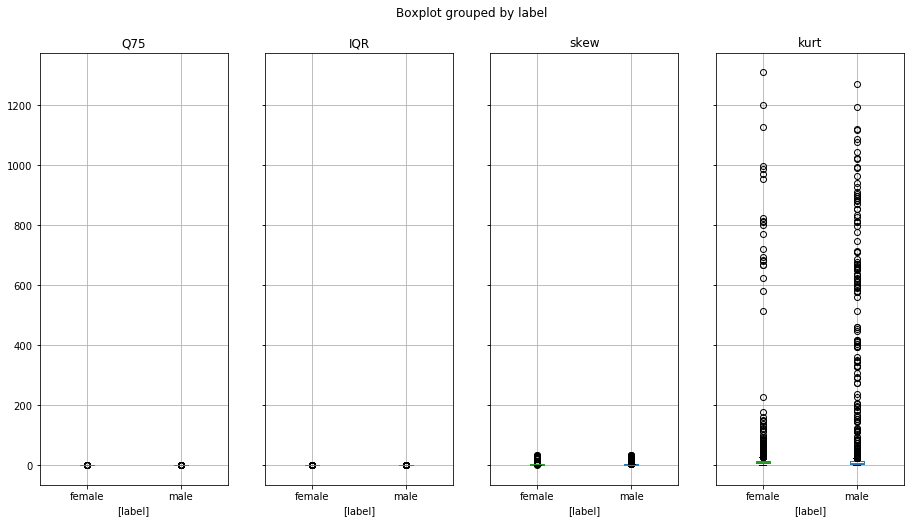

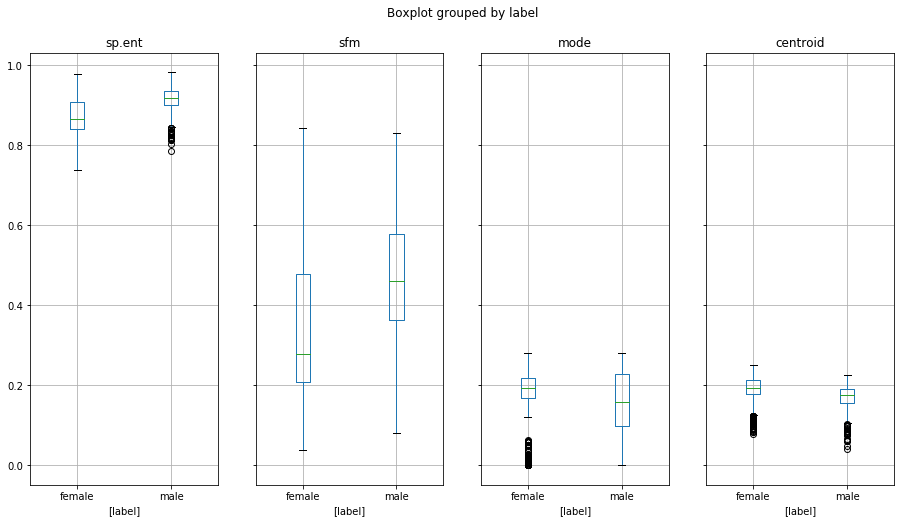

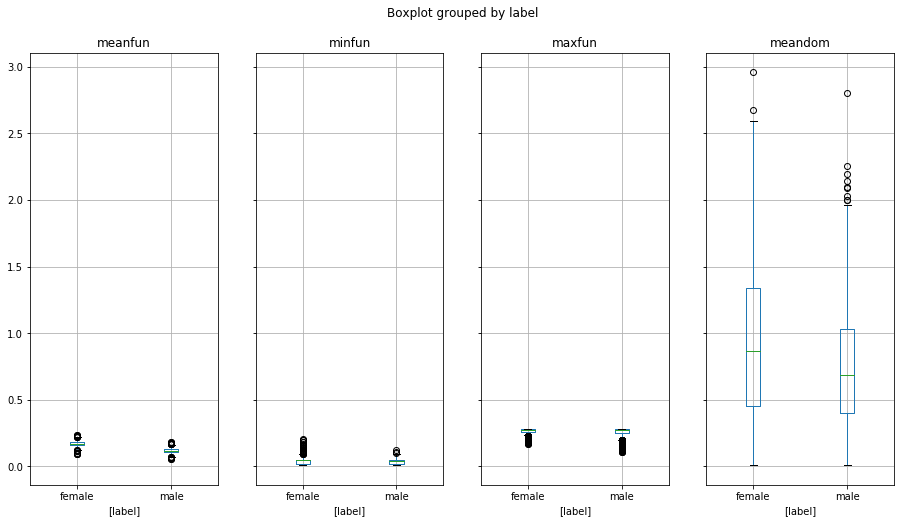

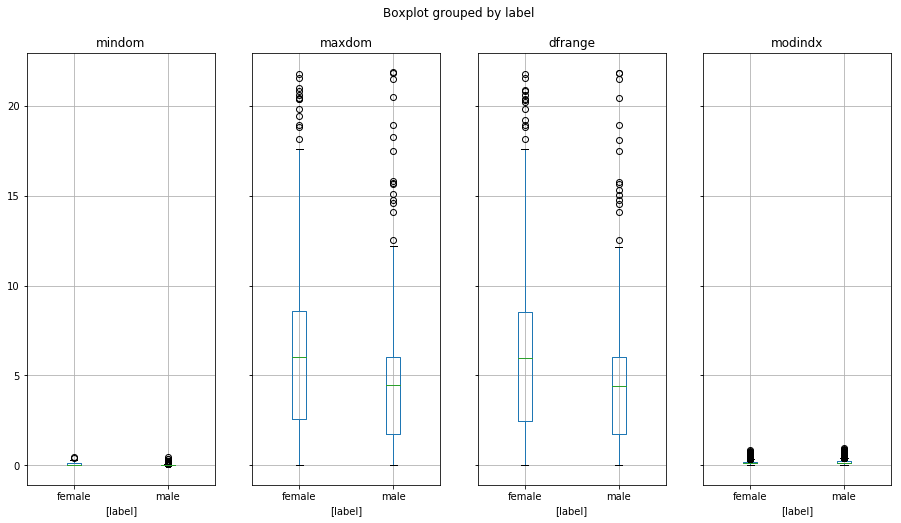

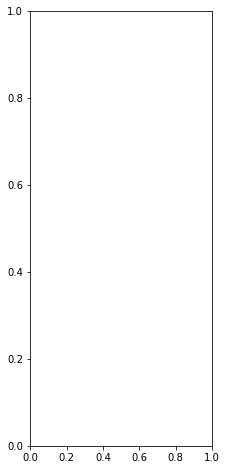

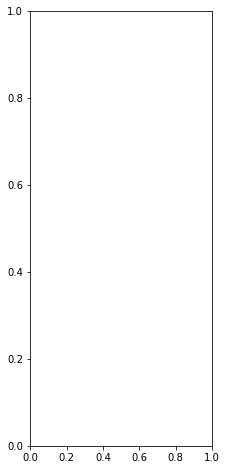

In [29]:
boxPlots(df_voice, list(df_voice)[:21], ["label"])

### Scatter plots
We can also use scatter plots to see how the features are seperated from each other. This is a very clear and visual representation of these points. Again we would like to automate things to make it easy to work with our dataset and swap features if needed.

In [42]:
def scatterplots(features, y, colors, labelnames, splitsize, random):    
    for value in features:
        names = list(value)
        value = StandardScaler().fit(value).transform(value)
        X_train, X_test, y_train, y_test = train_test_split(value,y,test_size=splitsize, random_state=random)
        for i in range(len(colors)):
            x1s = X_train[:, 0][y_train.as_matrix() == i]
            x2s = X_train[:, 1][y_train.as_matrix() == i]
            plt.scatter(x1s, x2s, c=colors[i])

        plt.legend(labelnames)
        plt.xlabel("Normalized " + names[0])
        plt.ylabel("Normalized " + names[1]);
        plt.show()

In [58]:
features = []
features.append(df_voice[["meanfreq", "sd"]])
features.append(df_voice[["meanfreq", "median"]])
features.append(df_voice[["meanfreq", "Q25"]])
features.append(df_voice[["meanfreq", "Q75"]])
features.append(df_voice[["meanfreq", "IQR"]])
features.append(df_voice[["Q25", "Q75"]])
features.append(df_voice[["mode", "Q25"]])
features.append(df_voice[["mode", "Q75"]])
features.append(df_voice[["meanfreq", "maxfun"]])
allfeatures = ["meanfreq", "sd", "median", "Q25", "Q75", "IQR", "skew", "kurt", "sp.ent", "sfm", "mode", "centroid", "meanfun", "minfun", "maxfun", "meandom", "mindom", "maxdom", "dfrange", "modindx"]

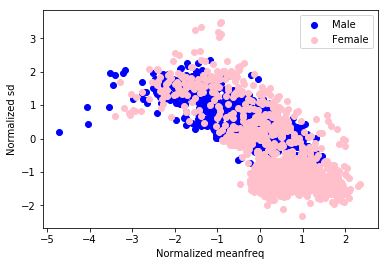

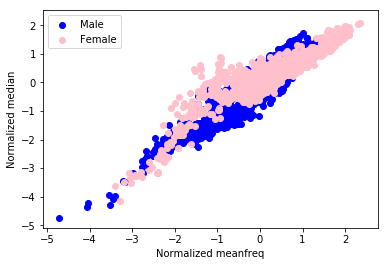

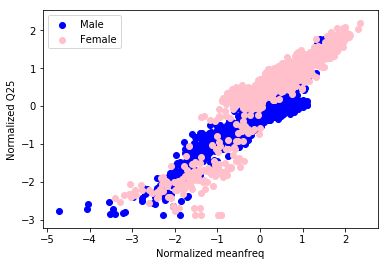

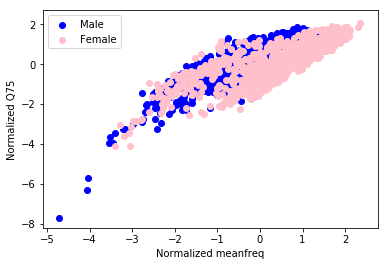

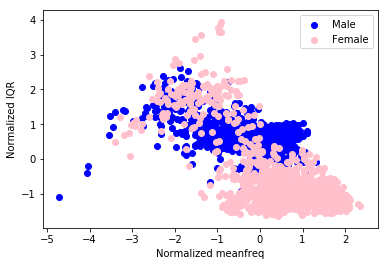

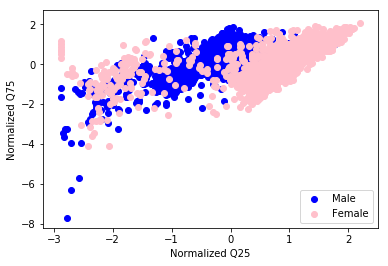

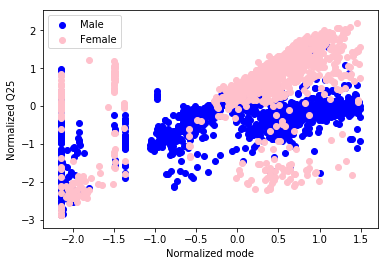

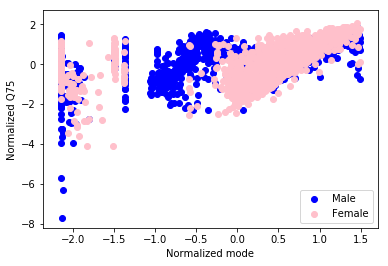

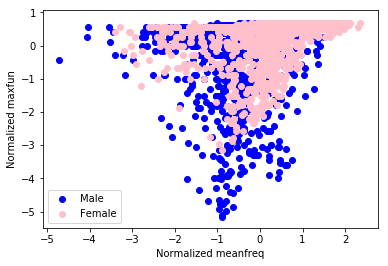

In [49]:
df_voice['gender'] = df_voice['label'].map({'male': 0, 'female': 1})
scatterplots(features, df_voice["gender"], ["blue", "pink"],  ["Male", "Female"],0.25, 69)

### KBest in a bar plot
KBest is made by SKLearn itself to search for the best features for the kNN algorithm. I decided to add this as a little extra since it has a clearn design. You can easily see which features are seen as the best by SKLearn and if that goes along with what we have found through our Box and Scatter plots

In [62]:
def findKBestFeatures(df, features, label):
    selector = SelectKBest(f_classif, k=5)
    selector.fit(features, df[label])
    scores = -np.log10(selector.pvalues_)
    plt.bar(range(len(scores)), scores)
    plt.xticks(range(len(scores)), list(features), rotation="vertical")
    plt.show()

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


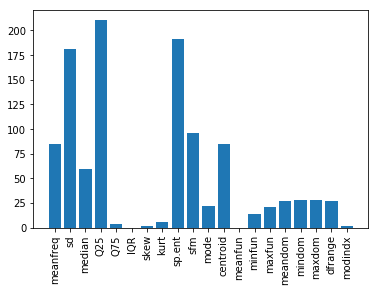

In [63]:
findKBestFeatures(df_voice, df_voice[allfeatures], ["gender"])

From the kBest test we can see that SD, Q25, sp.ent

# Prepairing the data
## Splitting Train and Test and Scaling

In [5]:
def trainTestSplit(df, features, label, size, seed):
    x = df[features]
    y = df[label]
    scaler = StandardScaler().fit(x)
    x = scaler.transform(x)
    return train_test_split(x,y,test_size=size, random_state=seed)

# Machine learning
## Accuracy tests
We want to test our data as efficient and modular as possible. I started noticing a pattern within the machine learning algorithms, you always define the classifier and then just use `clf.fit(X_train, y_train)`, `y_pred = clf.predict(x_test)` and `accuracy_score(y_test, y_pred)`. This means I can store these classifiers in a list and simpely loop over them instead of having to call the same sort of method around 12 times.

The make it easier to read I have provided the optional parameter `methodnames` so I can give a list of string that corrospond to the right method that was used. So instead of only printing out simple percentages, we get a nice summery in something like this:
*SVM: 96.46942%*
*Neural Network 1 Layer: 60.1684%*
*Neural Network 2 Layers: 86.6654%*

This gives us a nice and clean overview of what has been done with what method and removes the otherwise cluthered mess.
I could have included the normalizing and train test splitting within this method but decided not to do so for simplicity.
Having to explain a method like that would take a lot of space and I would prefer to keep that seperated in the datacleaning section.

In [20]:
def accuracy(methods, X_train, X_test, y_train, y_test,methodnames):
    accuracies = []
    for i in range(len(methods)):
        methods[i].fit(X_train, y_train)
        y_pred = methods[i].predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy*100)
        if(len(methodnames) > 0) and (len(methodnames)== len(methods)):
            print(methodnames[i] +": "+ str(accuracy*100) + "%")
        else:
            print(str(accuracy*100)+"%")
    plt.bar(range(len(accuracies)),accuracies)
    plt.xticks(range(len(accuracies)), methodnames,rotation='vertical')
    plt.show()

## Prepairing for the accuracy tests
Because the method does a lot by itself we only need to make our classifiers and add these to a list.
I am going to prepare 2 lists, one with methods and one with methodnames.
For the tests I will be trying out a lot of options within the parameters of the classifiers. These will all be noted in the methodnames to keep things organized.

In [7]:
methods = []
methodnames = []

# SVM

In [8]:
methods.append(SVC(kernel='linear', C=5))
methods.append(SVC(kernel='linear', C=10))
methods.append(SVC(kernel='linear', C=100))
methodnames.append("Linear SVC with C=5")
methodnames.append("Linear SVC with C=10")
methodnames.append("Linear SVC with C=100")

# Decision Tree Classifier

In [9]:
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5))
methods.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 5))
methodnames.append("Decision Tree with Depth 3 and Minimun samples leaf 5")
methodnames.append("Decision Tree with Depth 5 and Minimun samples leaf 5")
methodnames.append("Decision Tree with Depth 7 and Minimun samples leaf 5")

# Neural Networks

In [10]:
methods.append(MLPClassifier(hidden_layer_sizes=1))
methods.append(MLPClassifier(hidden_layer_sizes=2))
methods.append(MLPClassifier(hidden_layer_sizes=3))
methods.append(MLPClassifier(hidden_layer_sizes=10))
methodnames.append("MLP Neural Network with 1 hidden layer")
methodnames.append("MLP Neural Network with 2 hidden layers")
methodnames.append("MLP Neural Network with 3 hidden layers")
methodnames.append("MLP Neural Network with 10 hidden layers")

### Controlling the lists

In [11]:
print(methodnames)
print("Amount of methods: " + str(len(methods)))
print("Amount of names: " + str(len(methodnames)))
if(len(methods)==len(methodnames)):
    print("Correct amount of method names")
elif(methodnames == 0):
    print("No method names supplied")
else:
    print("Wrong amount of method names supplied")

['Linear SVC with C=5', 'Linear SVC with C=10', 'Linear SVC with C=100', 'Decision Tree with Depth 3 and Minimun samples leaf 5', 'Decision Tree with Depth 5 and Minimun samples leaf 5', 'Decision Tree with Depth 7 and Minimun samples leaf 5', 'MLP Neural Network with 1 hidden layer', 'MLP Neural Network with 2 hidden layers', 'MLP Neural Network with 3 hidden layers', 'MLP Neural Network with 10 hidden layers']
Amount of methods: 10
Amount of names: 10
Correct amount of method names


# Comparing the methods
## Making an empty DataFrame

In [12]:
def ensembleLearning(X_train, X_test, y_train, y_test, methods):
    result = []
    for x in np.nditer(y_test):
        result.append(int(x)) #Fix y_test indexing issues
    columns = ["SVC", "Tree", "MLP", "Majority", "Best Algorithm", "Ensemble Learning", "Correct Label"]
    df_results = pd.DataFrame(columns=columns) #Make a new empty dataframe
    for i in range(len(methods)): #Go through all methods
        methods[i].fit(X_train, y_train) #Train all the data
    for i in range(len(X_test)): #Go through all data
        y_pred = []
        for m in range(len(methods)): #Go through all methods 
            y_pred.append(int(methods[m].predict(X_test[i].reshape(1, -1)))) #Add the result to a list
        best = y_pred[2] #TODO Edit this later to set the best
        most = max(set(y_pred), key=y_pred.count) #Set the most frequent labels
        if(y_pred[0] != y_pred[1]) and (y_pred[0] != y_pred[2]) and (y_pred[1] != y_pred[2]): #Check if they are all the same
            ensemble = best #Set the best as the ensemble since everything is different
        else:
            ensemble = most #Set the most as the ensemble 
        df_results.loc[i] = [y_pred[0], y_pred[1], y_pred[2], most, best, ensemble, result[i]] #Put the row into the dataframe with the results.
    return df_results #Return the dataframe made

In [22]:
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None,names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])
df_iris['Class'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
X_train, X_test, y_train, y_test = trainTestSplit(df_iris, ["Petal Length", "Petal Width"], ["Class"], 0.25, 33)
methodstest = []
methodstest.append(SVC(kernel='linear', C=10))
methodstest.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5))
methodstest.append(MLPClassifier(hidden_layer_sizes=3))
result = ensembleLearning(X_train, X_test, y_train, y_test, methodstest)
result.head(5)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


,SVC,Tree,MLP,Majority,Best Algorithm,Ensemble Learning,Correct Label
0,1,1,0,1,0,1,1
1,1,1,0,1,0,1,1
2,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1
4,1,1,0,1,0,1,2


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Linear SVC with C=5: 94.7368421053%
Linear SVC with C=10: 94.7368421053%
Linear SVC with C=100: 94.7368421053%
Decision Tree with Depth 3 and Minimun samples leaf 5: 94.7368421053%
Decision Tree with Depth 5 and Minimun samples leaf 5: 94.7368421053%
Decision Tree with Depth 7 and Minimun samples leaf 5: 94.7368421053%
MLP Neural Network with 1 hidden layer: 50.0%
MLP Neural Network with 2 hidden layers: 2.63157894737%
MLP Neural Network with 3 hidden layers: 57.8947368421%
MLP Neural Network with 10 hidden layers: 97.3684210526%


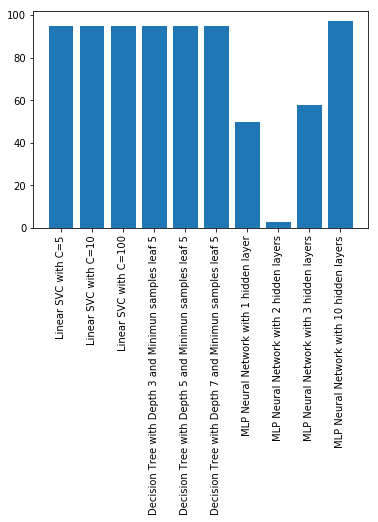

In [21]:
accuracy(methods, X_train, X_test, y_train, y_test,methodnames)

# Conclusion
### The task
I've programmed a method which checks 3 machine learning algorithms and provd

In [ ]:
findKBestFeatures(df_iris, X_train, ["Class"])